In [56]:
#import relevant libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [113]:
#Import the data
ebola_data = pd.read_csv('ebola_2014_2016_clean.csv')
ebola_data.head()

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430.0
1,Nigeria,2014-08-29,3.0,1.0,15.0,19.0,0.0,1.0,6.0,7.0
2,Sierra Leone,2014-08-29,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422.0
3,Liberia,2014-08-29,382.0,674.0,322.0,1378.0,168.0,301.0,225.0,694.0
4,Sierra Leone,2014-09-05,78.0,37.0,1146.0,1261.0,11.0,37.0,443.0,491.0


In [73]:
# Compute summary statistics for the dataset
summary_statistics = ebola_data.describe()

summary_statistics
# Save the summary statistics to a CSV file
# summary_statistics.to_csv('ebola_summary_statistics.csv')

KeyError: 'Date'

In [112]:
ebola_data.columns

Index(['Country', 'No. of suspected cases', 'No. of probable cases',
       'No. of confirmed cases',
       'No. of confirmed, probable and suspected cases',
       'No. of suspected deaths', 'No. of probable deaths',
       'No. of confirmed deaths',
       'No. of confirmed, probable and suspected deaths', 'YearMonth',
       'YearWeek'],
      dtype='object')

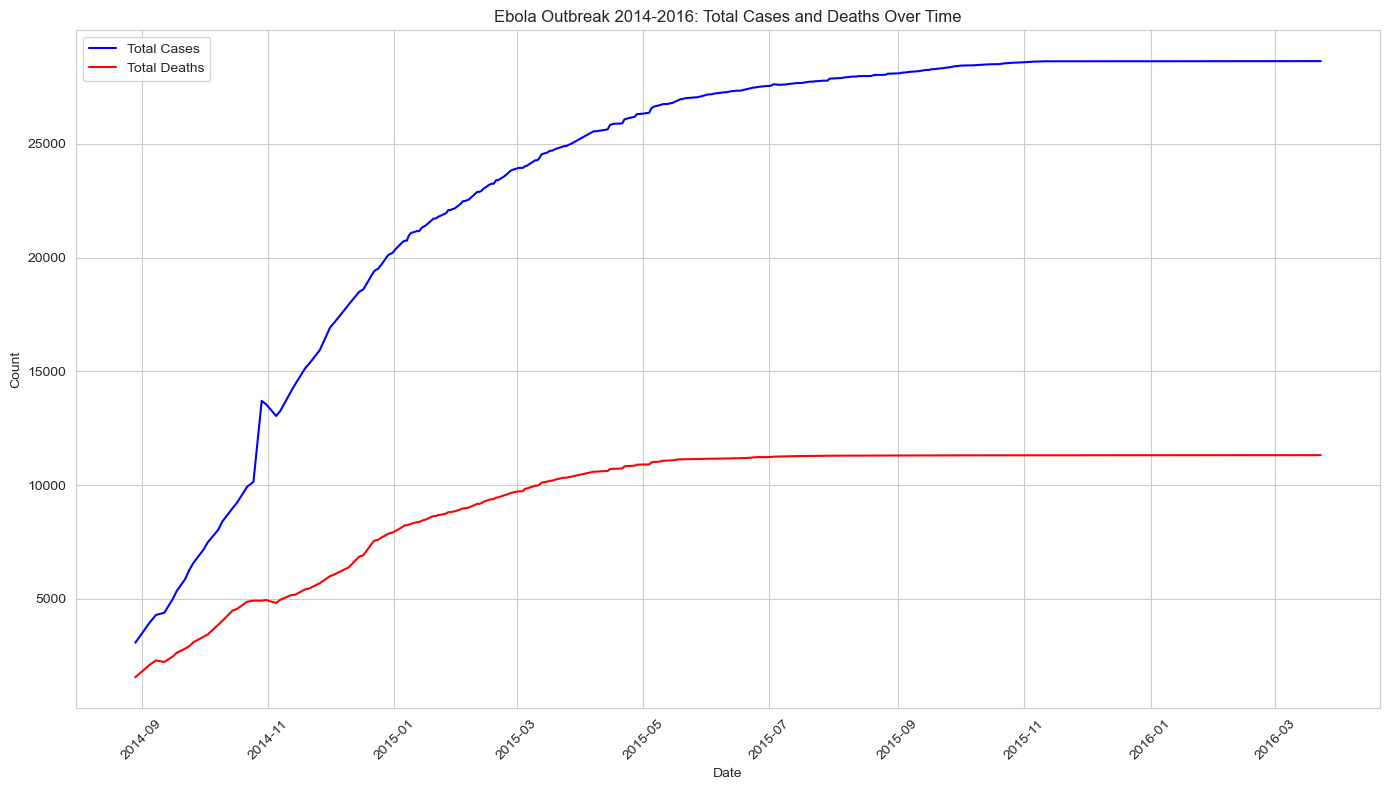

In [114]:

# Convert 'Date' column to datetime type
ebola_data['Date'] = pd.to_datetime(ebola_data['Date'])

# Aggregating data by date for time series analysis
daily_cases = ebola_data.groupby('Date')['No. of confirmed, probable and suspected cases'].sum()
daily_deaths = ebola_data.groupby('Date')['No. of confirmed, probable and suspected deaths'].sum()

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(x=daily_cases.index, y=daily_cases, label='Total Cases', color='blue')
sns.lineplot(x=daily_deaths.index, y=daily_deaths, label='Total Deaths', color='red')

plt.title('Ebola Outbreak 2014-2016: Total Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as an image
# plt.savefig('ebola_outbreak_plot.png', dpi=300)  # Save as PNG with higher resolution

# Display the plot
plt.show()

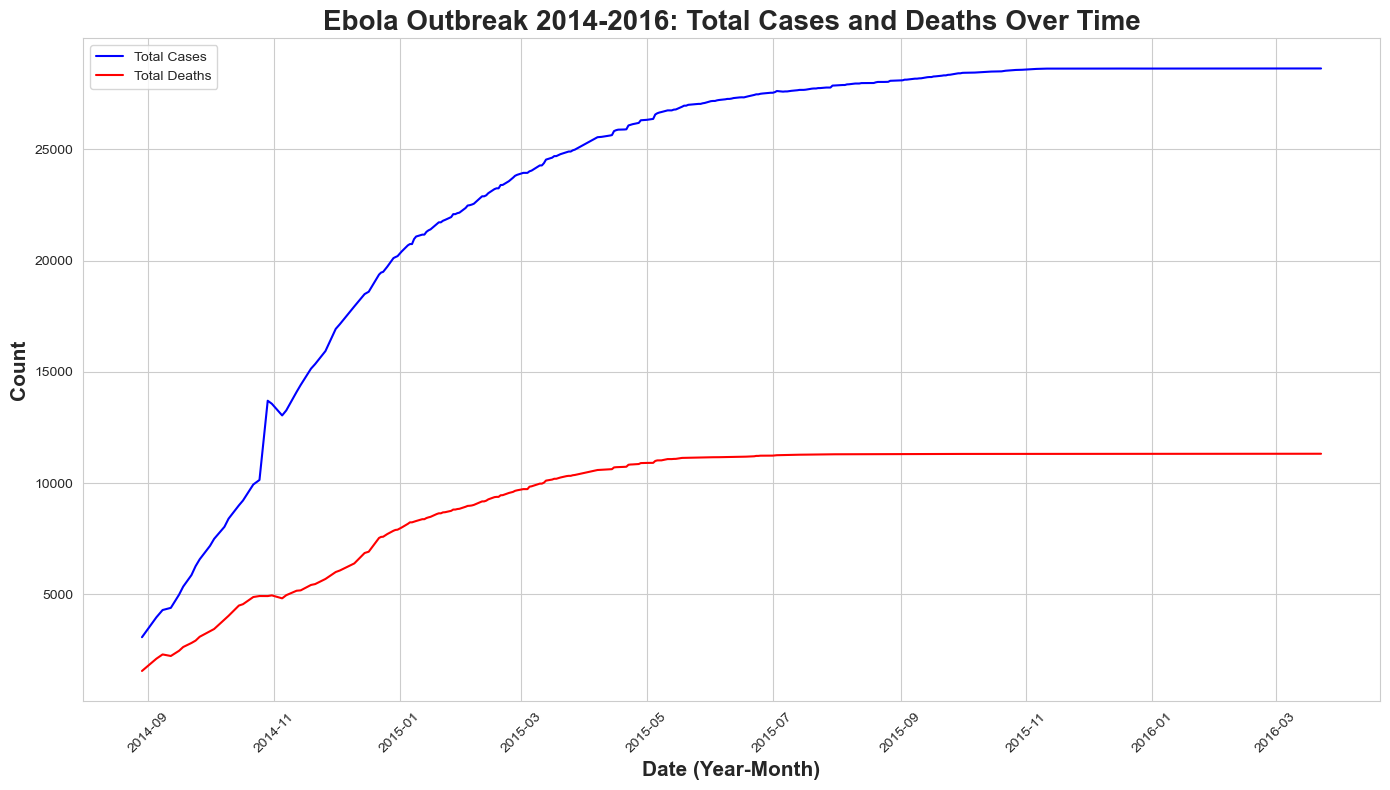

In [120]:

# Aggregating data by date for time series analysis
daily_cases = ebola_data.groupby('Date')['No. of confirmed, probable and suspected cases'].sum()
daily_deaths = ebola_data.groupby('Date')['No. of confirmed, probable and suspected deaths'].sum()

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(x=daily_cases.index, y=daily_cases, label='Total Cases', color='blue')
sns.lineplot(x=daily_deaths.index, y=daily_deaths, label='Total Deaths', color='red')

# Set title with bold, bigger, and thick font
plt.title('Ebola Outbreak 2014-2016: Total Cases and Deaths Over Time', fontweight='bold', fontsize=20)

# Set x and y axis labels with bold, bigger, and thick font
plt.xlabel('Date (Year-Month)', fontweight='bold', fontsize=15)
plt.ylabel('Count', fontweight='bold', fontsize=15)

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()


plt.savefig('ebola_outbreak_plot.png', dpi=300)

# Display the plot
plt.show()

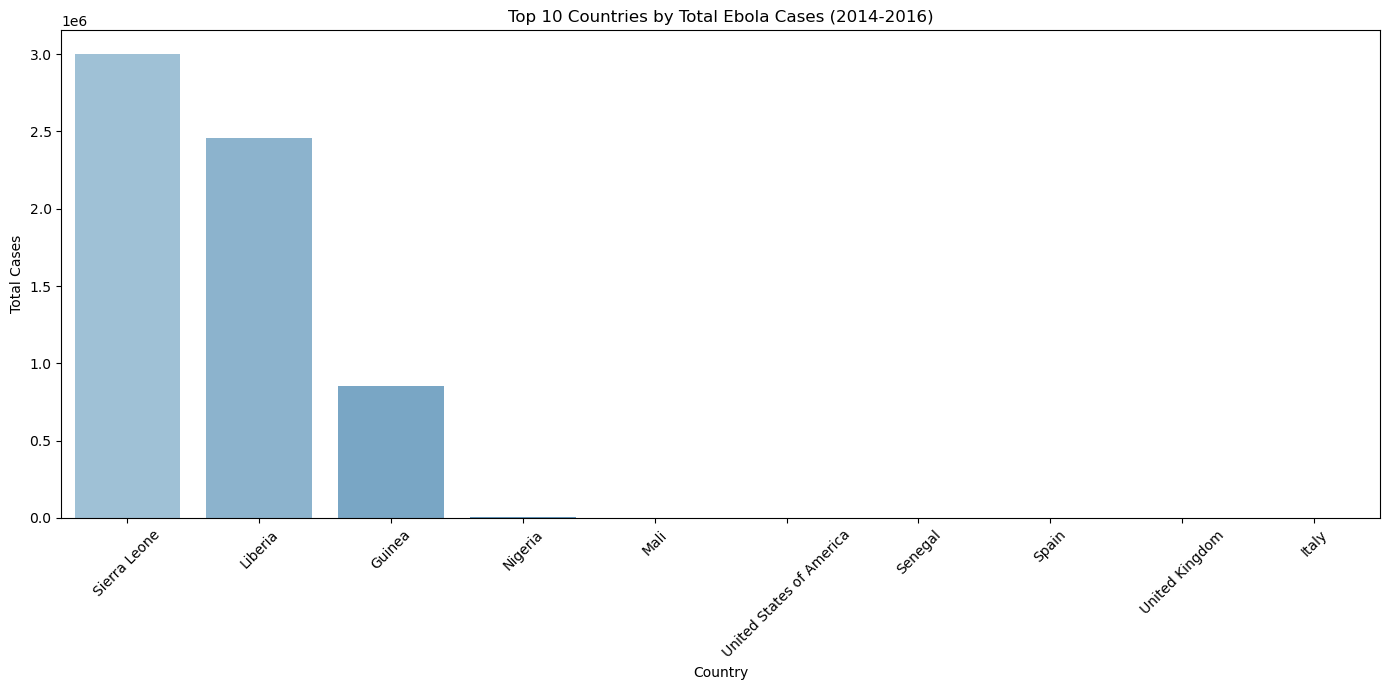

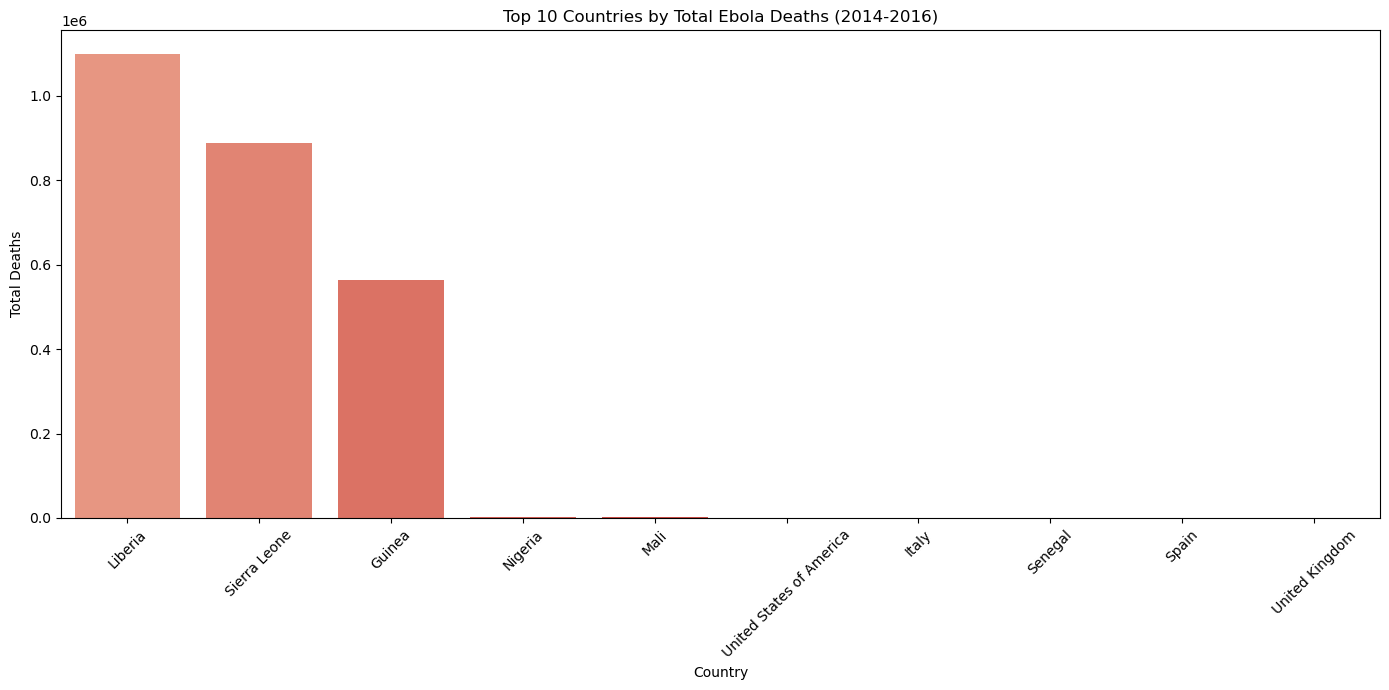

In [62]:
# Aggregating data by country
country_cases = ebola_data.groupby('Country')['No. of confirmed, probable and suspected cases'].sum().sort_values(ascending=False)
country_deaths = ebola_data.groupby('Country')['No. of confirmed, probable and suspected deaths'].sum().sort_values(ascending=False)

# Plotting the top 10 countries by total cases
plt.figure(figsize=(14, 7))
sns.barplot(x=country_cases[:10].index, y=country_cases[:10], palette='Blues_d')
plt.title('Top 10 Countries by Total Ebola Cases (2014-2016)')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the top 10 countries by total deaths
plt.figure(figsize=(14, 7))
sns.barplot(x=country_deaths[:10].index, y=country_deaths[:10], palette='Reds_d')
plt.title('Top 10 Countries by Total Ebola Deaths (2014-2016)')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [92]:

# Set the 'Date' column as the index of your DataFrame
ebola_data.set_index('Date', inplace=True)

# Resample the data by month and sum the values for cases and deaths
monthly_data = ebola_data.resample('M').sum()

# Calculate the month-to-month change in cases and deaths
monthly_change = monthly_data.diff()

# Plotting the month-to-month change
plt.figure(figsize=(12, 6))

# Plotting the changes; replace 'cases' and 'deaths' with your actual column names
plt.plot(monthly_change.index, monthly_change['cases'], label='Cases', marker='o') # Adjust column name as needed
plt.plot(monthly_change.index, monthly_change['deaths'], label='Deaths', marker='x') # Adjust column name as needed

plt.title('Month-to-Month Change in Ebola Cases and Deaths')
plt.xlabel('Month')
plt.ylabel('Change in Number')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

KeyError: 'cases'

<Figure size 1200x600 with 0 Axes>

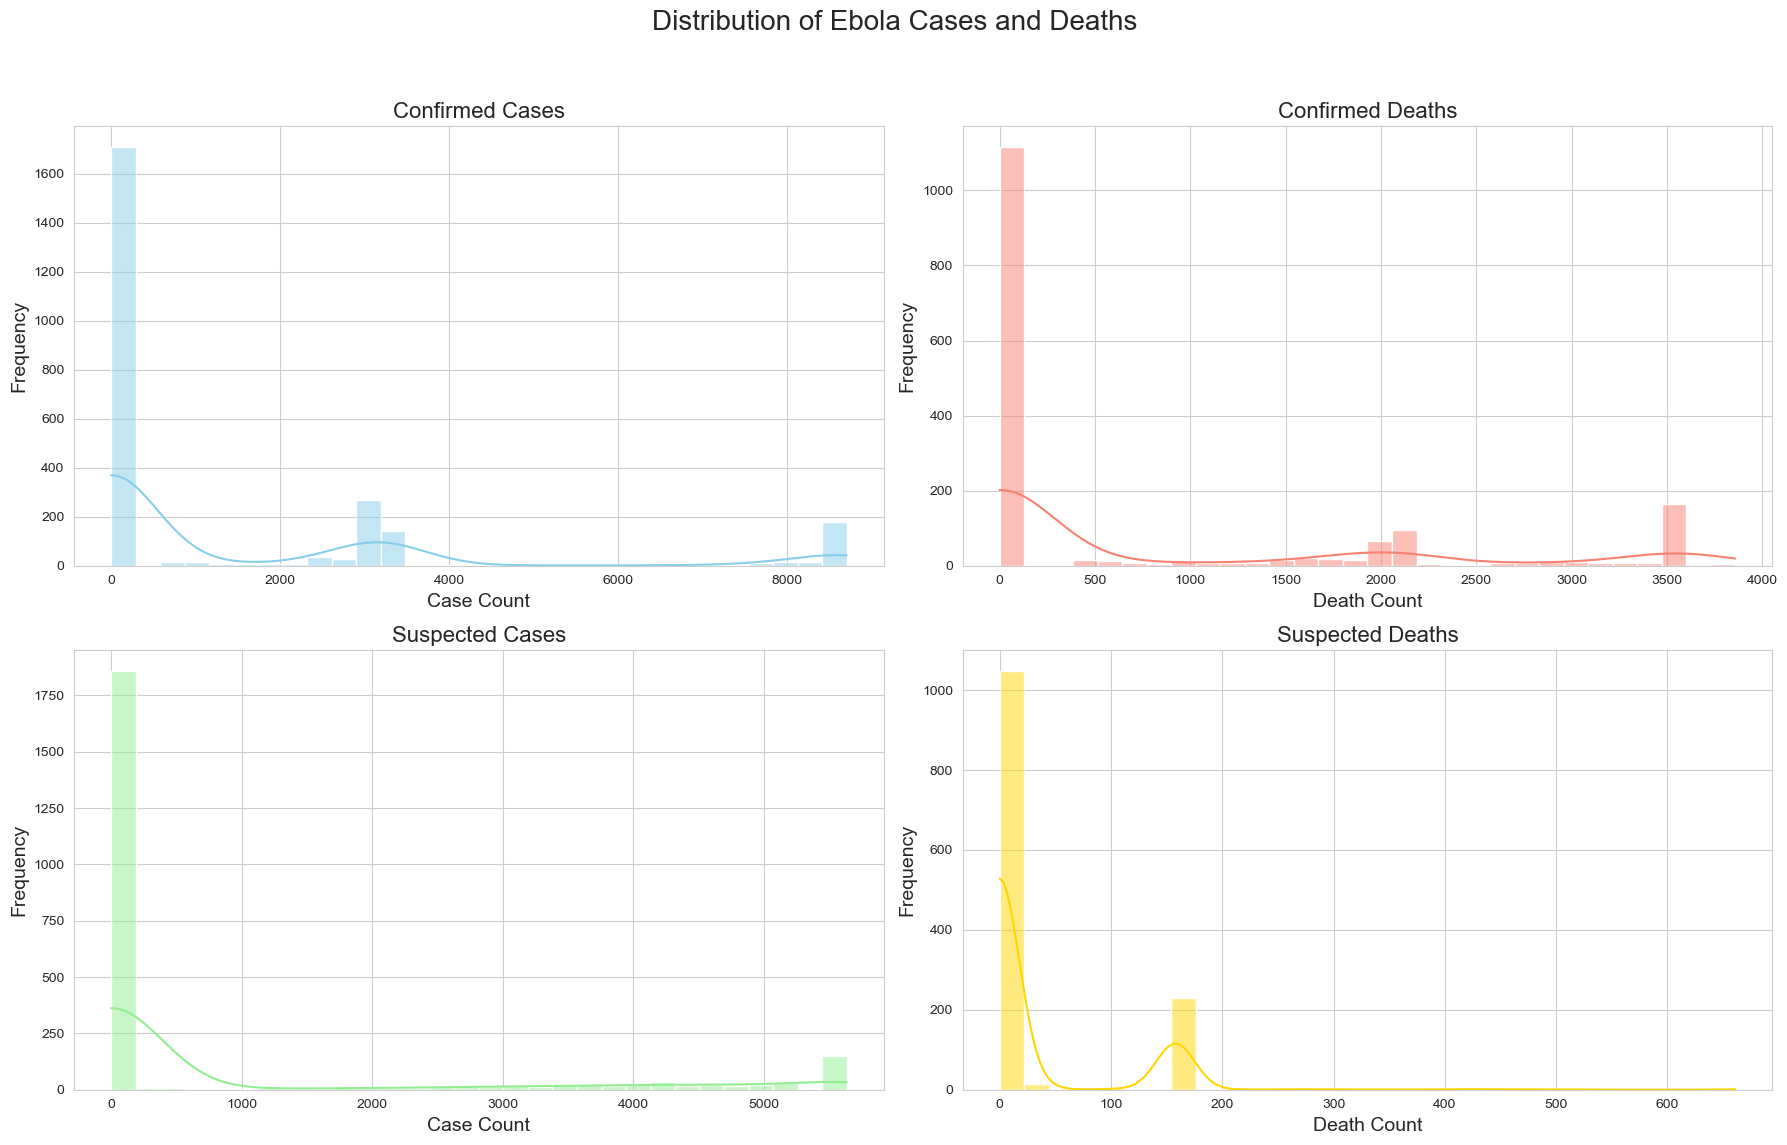

In [64]:
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")


# Prepare figure layout
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribution of Ebola Cases and Deaths', fontsize=20)

# Plot histograms
sns.histplot(ebola_data['No. of confirmed cases'], bins=30, ax=axes[0, 0], color='skyblue', kde=True)
axes[0, 0].set_title('Confirmed Cases', fontsize=16)
axes[0, 0].set_xlabel('Case Count', fontsize=14)
axes[0, 0].set_ylabel('Frequency', fontsize=14)

sns.histplot(ebola_data['No. of confirmed deaths'], bins=30, ax=axes[0, 1], color='salmon', kde=True)
axes[0, 1].set_title('Confirmed Deaths', fontsize=16)
axes[0, 1].set_xlabel('Death Count', fontsize=14)
axes[0, 1].set_ylabel('Frequency', fontsize=14)

sns.histplot(ebola_data['No. of suspected cases'], bins=30, ax=axes[1, 0], color='lightgreen', kde=True)
axes[1, 0].set_title('Suspected Cases', fontsize=16)
axes[1, 0].set_xlabel('Case Count', fontsize=14)
axes[1, 0].set_ylabel('Frequency', fontsize=14)

sns.histplot(ebola_data['No. of suspected deaths'], bins=30, ax=axes[1, 1], color='gold', kde=True)
axes[1, 1].set_title('Suspected Deaths', fontsize=16)
axes[1, 1].set_xlabel('Death Count', fontsize=14)
axes[1, 1].set_ylabel('Frequency', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

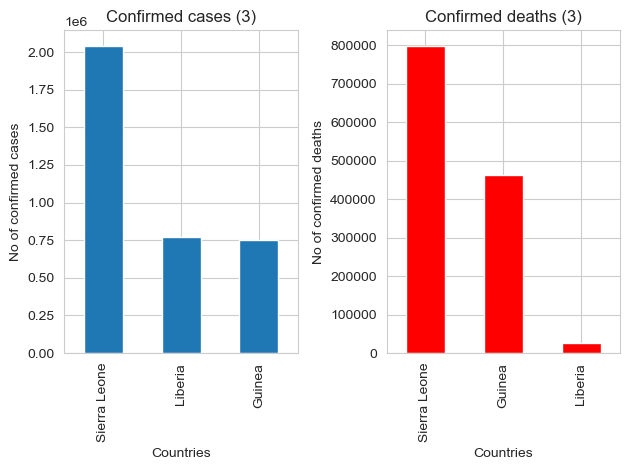

In [81]:
#Barchart showing Countries with the highest number of confirmed cases and highest number confirmed deaths(3)
plt.subplot(1,2,1)
df.groupby('Country')['No. of confirmed cases'].sum().nlargest(3).plot(kind = 'bar', grid = True)
plt.title('Confirmed cases (3)')
plt.xlabel('Countries')
plt.ylabel('No of confirmed cases')
plt.subplot(1,2,2)
df.groupby('Country')['No. of confirmed deaths'].sum().nlargest(3).plot(kind = 'bar', grid = True,
                                                                       color = 'red')
plt.title('Confirmed deaths (3)')
plt.xlabel('Countries')
plt.ylabel('No of confirmed deaths')
plt.tight_layout()
plt.show()

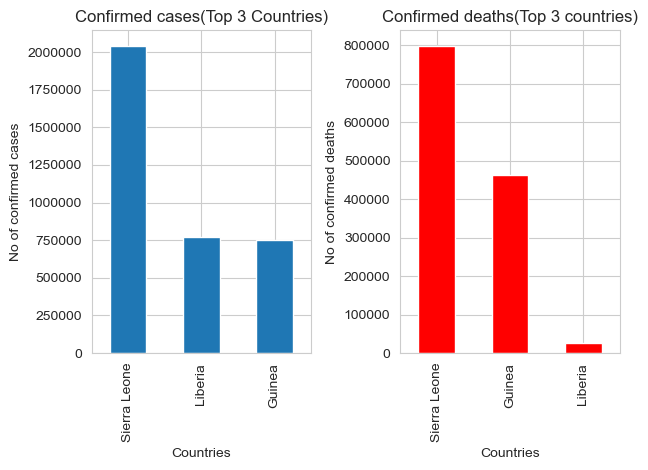

In [121]:
import matplotlib.pyplot as plt

# Barchart showing Countries with the highest number of confirmed cases and highest number confirmed deaths(3)
plt.subplot(1,2,1)
cases = df.groupby('Country')['No. of confirmed cases'].sum().nlargest(3)
cases.plot(kind='bar', grid=True)
plt.title('Confirmed cases(Top 3 Countries)')
plt.xlabel('Countries')
plt.ylabel('No of confirmed cases')
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation on y-axis

plt.subplot(1,2,2)
deaths = df.groupby('Country')['No. of confirmed deaths'].sum().nlargest(3)
deaths.plot(kind='bar', grid=True, color='red')
plt.title('Confirmed deaths(Top 3 countries)')
plt.xlabel('Countries')
plt.ylabel('No of confirmed deaths')
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation on y-axis

# Adjust spacing between the two graphs
plt.subplots_adjust(wspace=0.5)  # Adjust horizontal spacing between subplots
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Adjust space between graphs

plt.tight_layout()


# Save the plot as an image
plt.savefig('ebola_outbreak_Top3.png', dpi=300)
plt.show()


In [89]:
cases = df.groupby('Country')['No. of confirmed cases'].sum().nlargest(3)
cases

Country
Sierra Leone    2041871.0
Liberia          768738.0
Guinea           749622.0
Name: No. of confirmed cases, dtype: float64

In [90]:
deaths = df.groupby('Country')['No. of confirmed deaths'].sum().nlargest(3)
deaths

Country
Sierra Leone    797984.0
Guinea          461211.0
Liberia          26937.0
Name: No. of confirmed deaths, dtype: float64

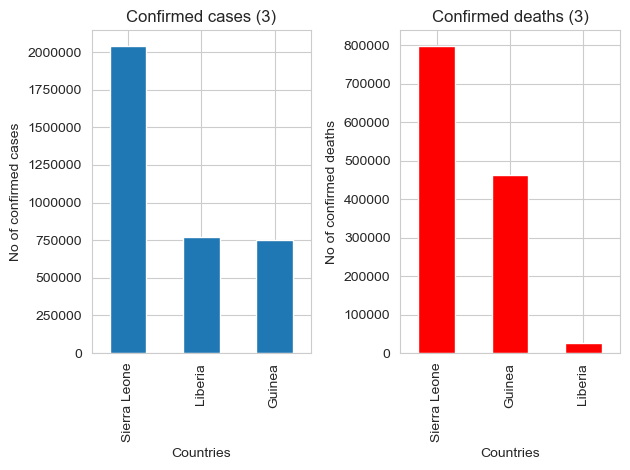

In [87]:
import matplotlib.pyplot as plt

# Barchart showing Countries with the highest number of confirmed cases and highest number confirmed deaths(3)
plt.subplot(1,2,1)
cases = df.groupby('Country')['No. of confirmed cases'].sum().nlargest(3)
cases.plot(kind='bar', grid=True)
plt.title('Confirmed cases (3)')
plt.xlabel('Countries')
plt.ylabel('No of confirmed cases')
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation on y-axis

plt.subplot(1,2,2)
deaths = df.groupby('Country')['No. of confirmed deaths'].sum().nlargest(3)
deaths.plot(kind='bar', grid=True, color='red')
plt.title('Confirmed deaths (3)')
plt.xlabel('Countries')
plt.ylabel('No of confirmed deaths')
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation on y-axis

# Adjust spacing between the two graphs
plt.subplots_adjust(wspace=0.5)  # Adjust horizontal spacing between subplots
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Adjust space between graphs

# Add space between the two graphs
plt.subplots_adjust(hspace=0.5)

plt.tight_layout()
plt.show()


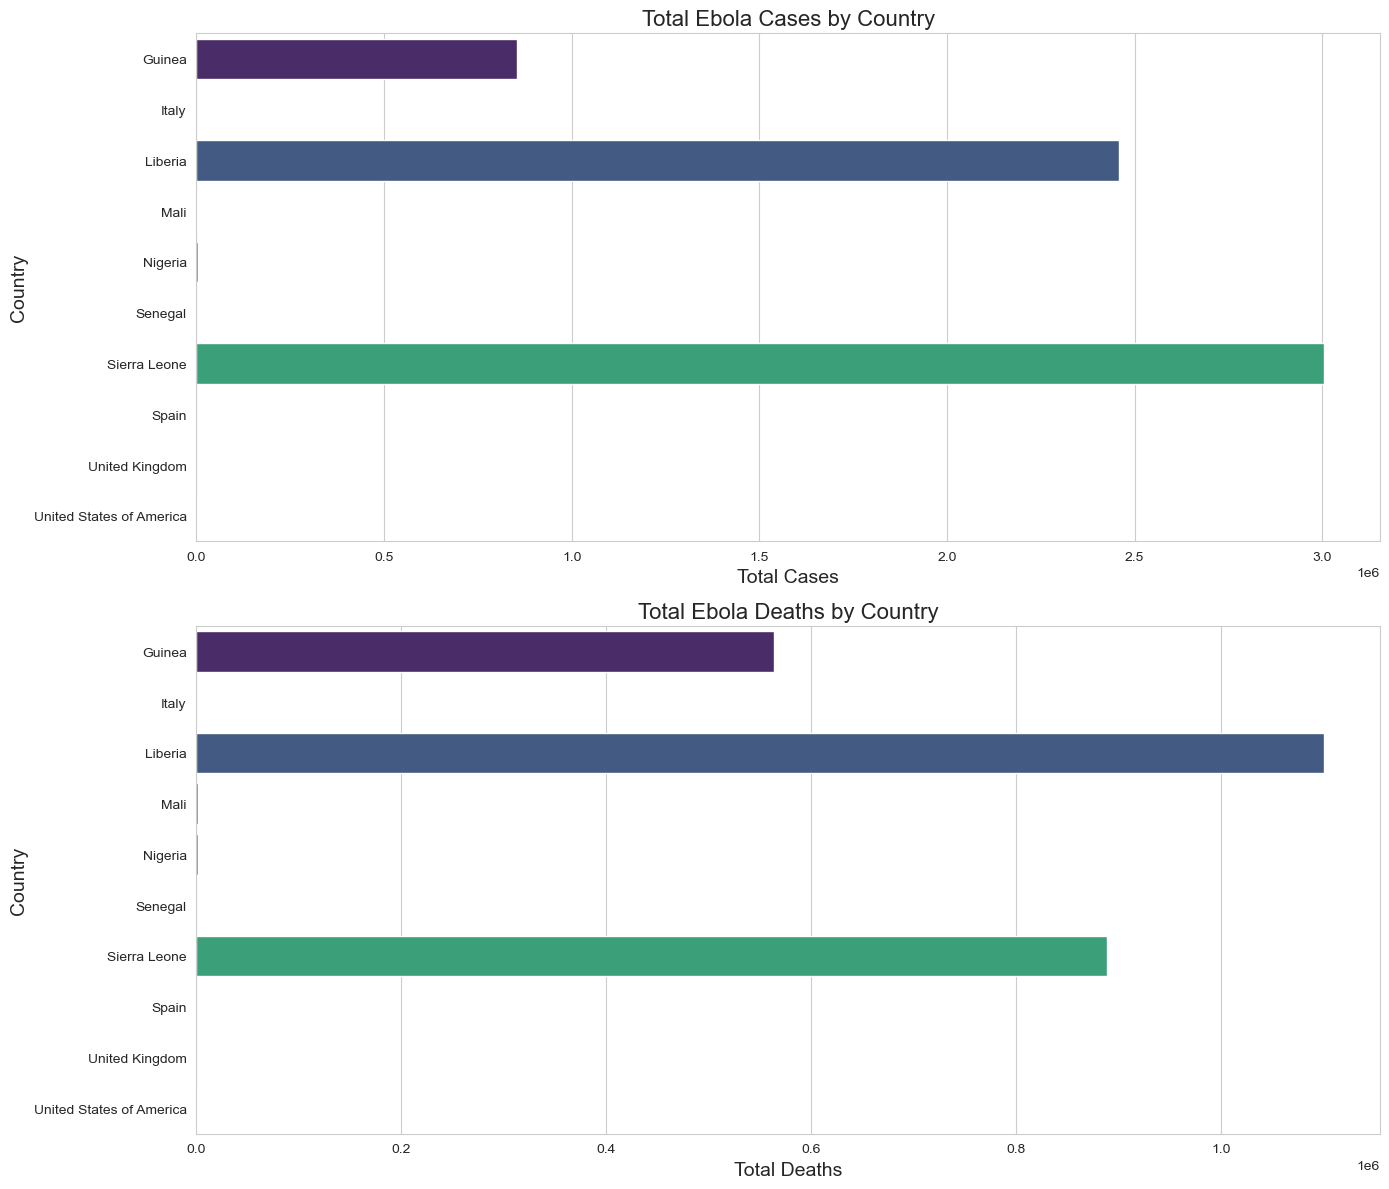

In [66]:
# Aggregating data by country for total cases and deaths
country_totals = ebola_data.groupby('Country').agg({
    'No. of confirmed, probable and suspected cases': 'sum',
    'No. of confirmed, probable and suspected deaths': 'sum'
}).reset_index()

# Country Comparison: Total cases and deaths
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Total cases by country
sns.barplot(x="No. of confirmed, probable and suspected cases", y="Country", data=country_totals, ax=ax[0], palette="viridis")
ax[0].set_title('Total Ebola Cases by Country', fontsize=16)
ax[0].set_xlabel('Total Cases', fontsize=14)
ax[0].set_ylabel('Country', fontsize=14)

# Total deaths by country
sns.barplot(x="No. of confirmed, probable and suspected deaths", y="Country", data=country_totals, ax=ax[1], palette="viridis")
ax[1].set_title('Total Ebola Deaths by Country', fontsize=16)
ax[1].set_xlabel('Total Deaths', fontsize=14)
ax[1].set_ylabel('Country', fontsize=14)

plt.tight_layout()
plt.show()


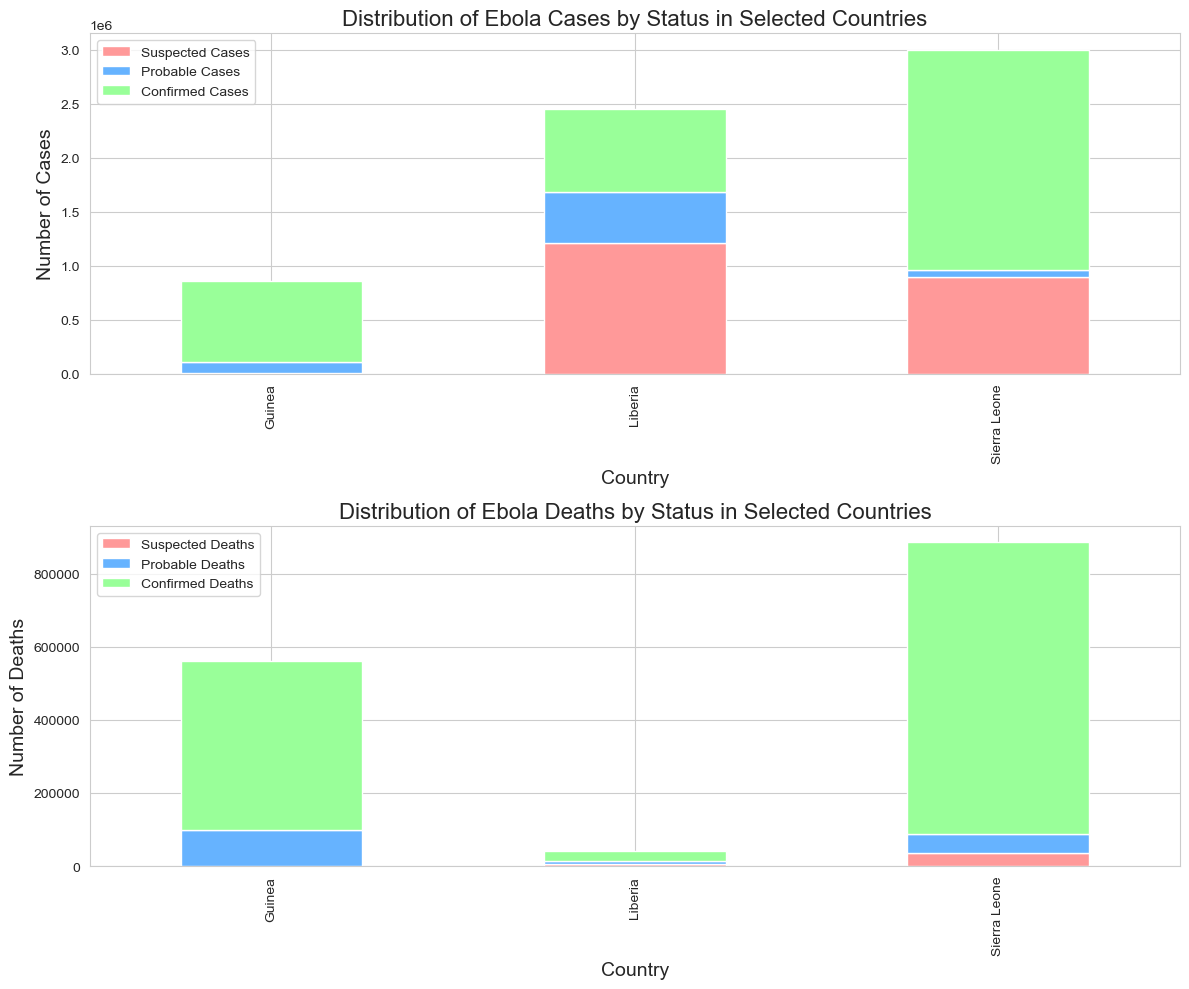

In [67]:
# Aggregate data for suspected, probable, and confirmed cases and deaths by country
case_death_columns = [
    'No. of suspected cases', 'No. of probable cases', 'No. of confirmed cases',
    'No. of suspected deaths', 'No. of probable deaths', 'No. of confirmed deaths'
]
country_cases_deaths_totals = ebola_data.groupby('Country')[case_death_columns].sum().reset_index()

# Selecting a subset of countries for clearer visualization
selected_countries = ['Guinea', 'Liberia', 'Sierra Leone']
selected_data = country_cases_deaths_totals[country_cases_deaths_totals['Country'].isin(selected_countries)]

# Stacked bar plot for cases
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Cases
selected_data[['Country', 'No. of suspected cases', 'No. of probable cases', 'No. of confirmed cases']].set_index('Country').plot(kind='bar', stacked=True, ax=ax[0], color=['#ff9999','#66b3ff','#99ff99'])
ax[0].set_title('Distribution of Ebola Cases by Status in Selected Countries', fontsize=16)
ax[0].set_ylabel('Number of Cases', fontsize=14)
ax[0].set_xlabel('Country', fontsize=14)
ax[0].legend(['Suspected Cases', 'Probable Cases', 'Confirmed Cases'])

# Deaths
selected_data[['Country', 'No. of suspected deaths', 'No. of probable deaths', 'No. of confirmed deaths']].set_index('Country').plot(kind='bar', stacked=True, ax=ax[1], color=['#ff9999','#66b3ff','#99ff99'])
ax[1].set_title('Distribution of Ebola Deaths by Status in Selected Countries', fontsize=16)
ax[1].set_ylabel('Number of Deaths', fontsize=14)
ax[1].set_xlabel('Country', fontsize=14)
ax[1].legend(['Suspected Deaths', 'Probable Deaths', 'Confirmed Deaths'])

plt.tight_layout()
plt.show()


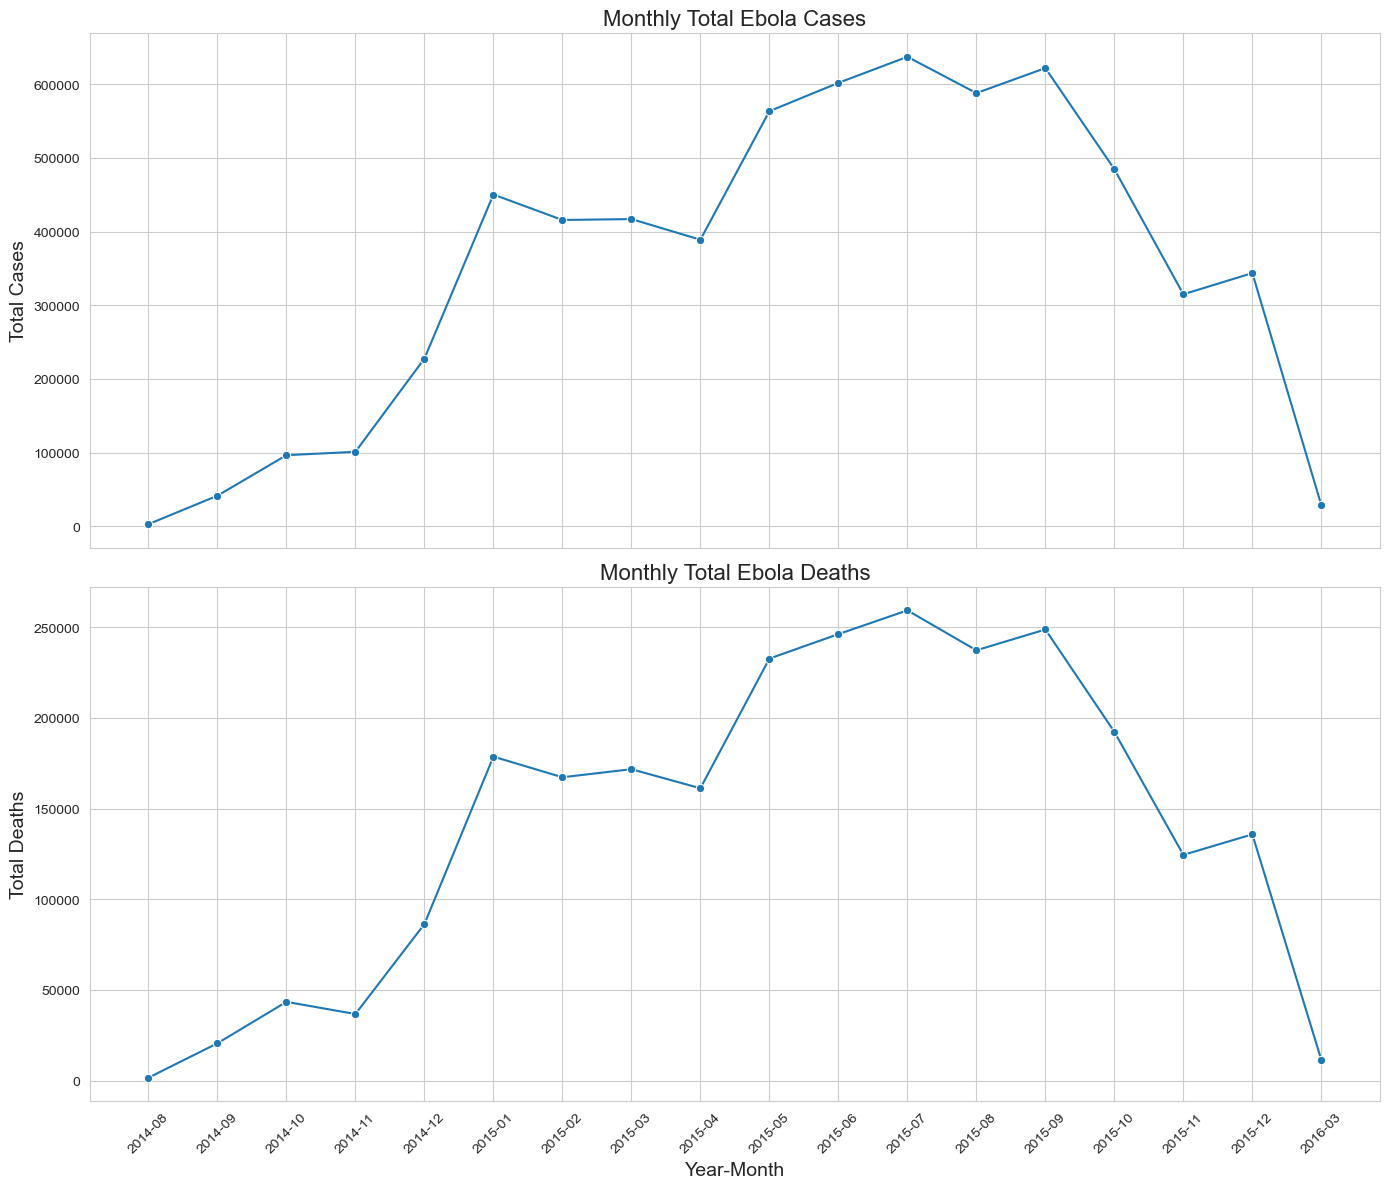

In [68]:
# Aggregate data by month
ebola_data['YearMonth'] = ebola_data['Date'].dt.to_period('M')
monthly_data = ebola_data.groupby('YearMonth').agg({
    'No. of confirmed, probable and suspected cases': 'sum',
    'No. of confirmed, probable and suspected deaths': 'sum'
}).reset_index()

# Convert 'YearMonth' to string for plotting
monthly_data['YearMonth'] = monthly_data['YearMonth'].astype(str)

# Plotting Monthly Trends: Total cases and deaths
fig, ax = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Total cases by month
sns.lineplot(x="YearMonth", y="No. of confirmed, probable and suspected cases", data=monthly_data, ax=ax[0], marker="o")
ax[0].set_title('Monthly Total Ebola Cases', fontsize=16)
ax[0].set_ylabel('Total Cases', fontsize=14)
ax[0].set_xlabel('Year-Month', fontsize=14)
ax[0].tick_params(axis='x', rotation=45)

# Total deaths by month
sns.lineplot(x="YearMonth", y="No. of confirmed, probable and suspected deaths", data=monthly_data, ax=ax[1], marker="o")
ax[1].set_title('Monthly Total Ebola Deaths', fontsize=16)
ax[1].set_ylabel('Total Deaths', fontsize=14)
ax[1].set_xlabel('Year-Month', fontsize=14)
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


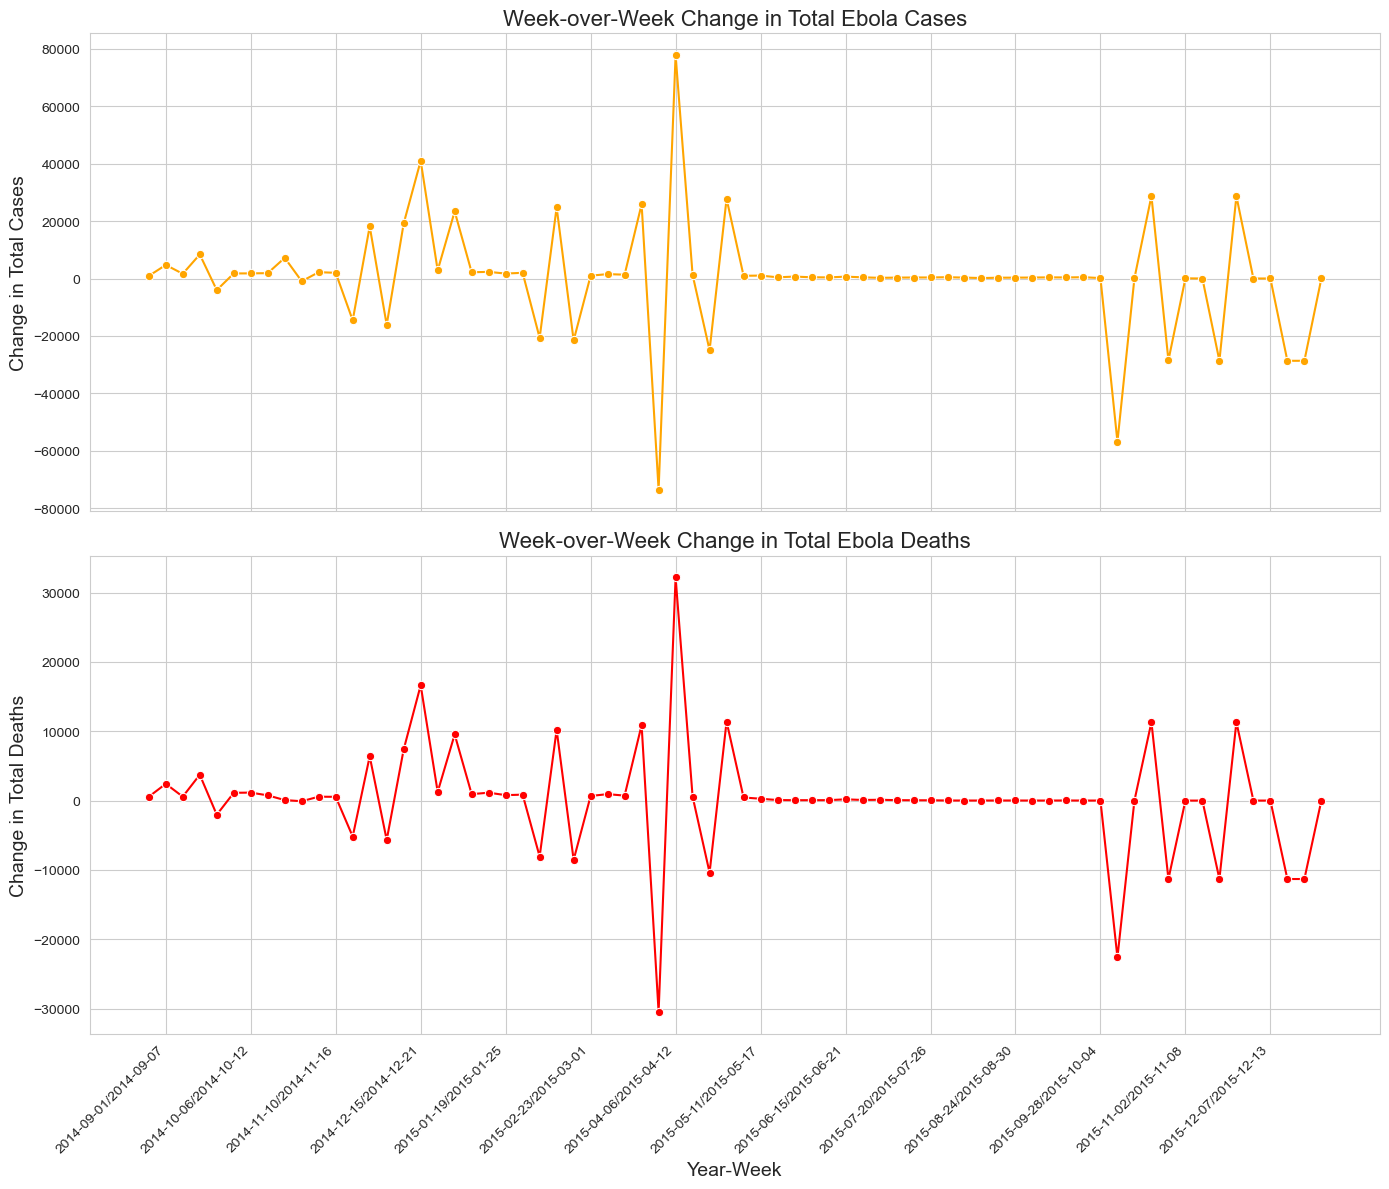

In [79]:
# Recreating the weekly_data dataframe
ebola_data['YearWeek'] = ebola_data['Date'].dt.to_period('W')
weekly_data_redefined = ebola_data.groupby('YearWeek').agg({
    'No. of confirmed, probable and suspected cases': 'sum',
    'No. of confirmed, probable and suspected deaths': 'sum'
}).diff().reset_index()

# Removing the first row since diff() will result in NaN values for the first entry
weekly_data_redefined = weekly_data_redefined.dropna()

# Convert 'YearWeek' to string for plotting
weekly_data_redefined['YearWeek'] = weekly_data_redefined['YearWeek'].astype(str)

# Selecting a subset of the weekly data to display on the x-axis for better readability
tick_spacing = 5  # Display every 5th week to prevent overlap
ticks_redefined = weekly_data_redefined['YearWeek'][::tick_spacing]

# Plotting with adjusted x-axis ticks
fig, ax = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Week-over-week change in cases
sns.lineplot(x="YearWeek", y="No. of confirmed, probable and suspected cases", data=weekly_data_redefined, ax=ax[0], marker="o", color="orange")
ax[0].set_title('Week-over-Week Change in Total Ebola Cases', fontsize=16)
ax[0].set_ylabel('Change in Total Cases', fontsize=14)
ax[0].set_xlabel('Year-Week', fontsize=14)
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_xticks(ticks_redefined.index)
ax[0].set_xticklabels(ticks_redefined.values, rotation=45, ha="right")

# Week-over-week change in deaths
sns.lineplot(x="YearWeek", y="No. of confirmed, probable and suspected deaths", data=weekly_data_redefined, ax=ax[1], marker="o", color="red")
ax[1].set_title('Week-over-Week Change in Total Ebola Deaths', fontsize=16)
ax[1].set_ylabel('Change in Total Deaths', fontsize=14)
ax[1].set_xlabel('Year-Week', fontsize=14)
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_xticks(ticks_redefined.index)
ax[1].set_xticklabels(ticks_redefined.values, rotation=45, ha="right")

plt.tight_layout()


# Save the plot as an image
# plt.savefig('week_to_week_change.png', dpi=300)
plt.show()


In [95]:
ebola_data.columns

Index(['Country', 'No. of suspected cases', 'No. of probable cases',
       'No. of confirmed cases',
       'No. of confirmed, probable and suspected cases',
       'No. of suspected deaths', 'No. of probable deaths',
       'No. of confirmed deaths',
       'No. of confirmed, probable and suspected deaths', 'YearMonth',
       'YearWeek'],
      dtype='object')

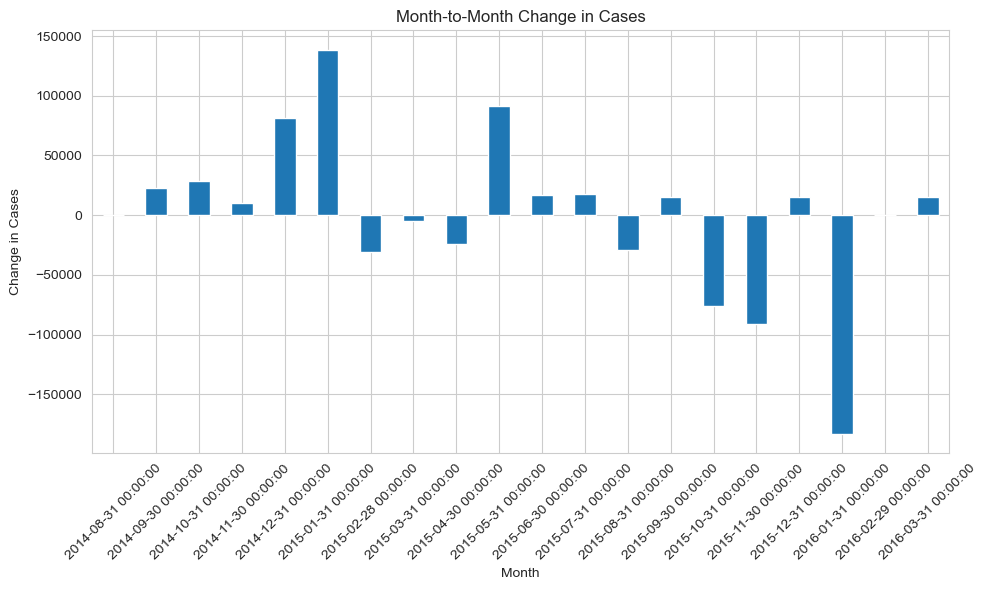

In [98]:
# Assuming the cases column is named 'Cases', replace 'Cases' with the actual name of your cases column
# Resample by month and sum the cases for each month
monthly_cases = ebola_data['No. of confirmed cases'].resample('M').sum()

# Calculate the month-to-month change in cases
monthly_change = monthly_cases.diff()

# Plot the month-to-month change in cases
plt.figure(figsize=(10, 6))
monthly_change.plot(kind='bar')
plt.title('Month-to-Month Change in Cases')
plt.xlabel('Month')
plt.ylabel('Change in Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ValueError: cannot convert float NaN to integer

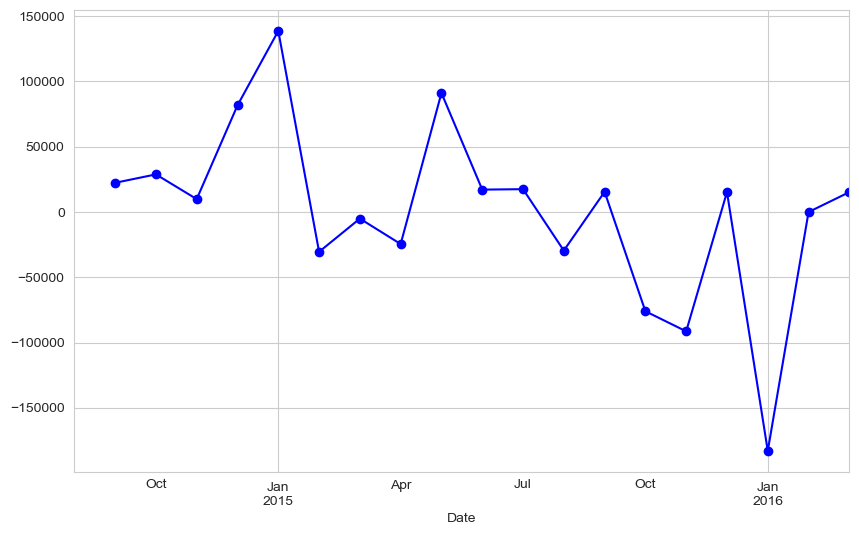

In [100]:
# ng the cases column is named 'Cases', replace 'Cases' with the actual name of your cases column
# Resample by month and sum the cases for each month
monthly_cases = ebola_data['No. of confirmed cases'].resample('M').sum()

# Calculate the month-to-month change in cases
monthly_change = monthly_cases.diff()

# Plot the month-to-month change in cases as a line plot with markers
plt.figure(figsize=(10, 6))
monthly_change.plot(marker='o', color='b', linestyle='-')

# Add annotations for the markers
for i, change in enumerate(monthly_change):
    plt.text(i, change, f'{int(change)}', ha='center', va='bottom', fontsize=8)

plt.title('Month-to-Month Change in Cases')
plt.xlabel('Month')
plt.ylabel('Change in Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

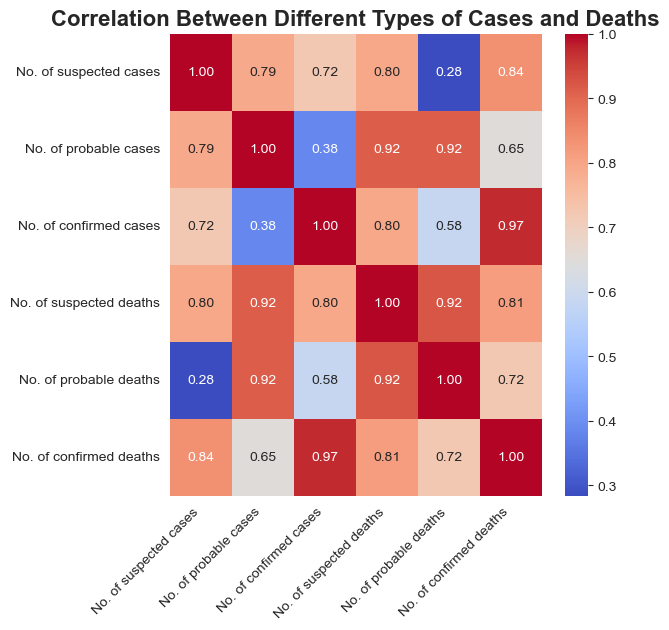

In [107]:

# Heatmap: Correlation between different types of cases and deaths
correlation_matrix = ebola_data[['No. of suspected cases', 'No. of probable cases', 'No. of confirmed cases', 'No. of suspected deaths', 'No. of probable deaths', 'No. of confirmed deaths']].corr()

plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adjusting title font properties
plt.title('Correlation Between Different Types of Cases and Deaths', fontsize=16, fontweight='bold')

# Adjusting x-axis tick labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the plot as an image
plt.savefig('correlation_heatmap.png', bbox_inches='tight')  # Save as PNG with tight bounding box



# Save the plot as an image
plt.savefig('correlations.png', dpi=300)

plt.show()

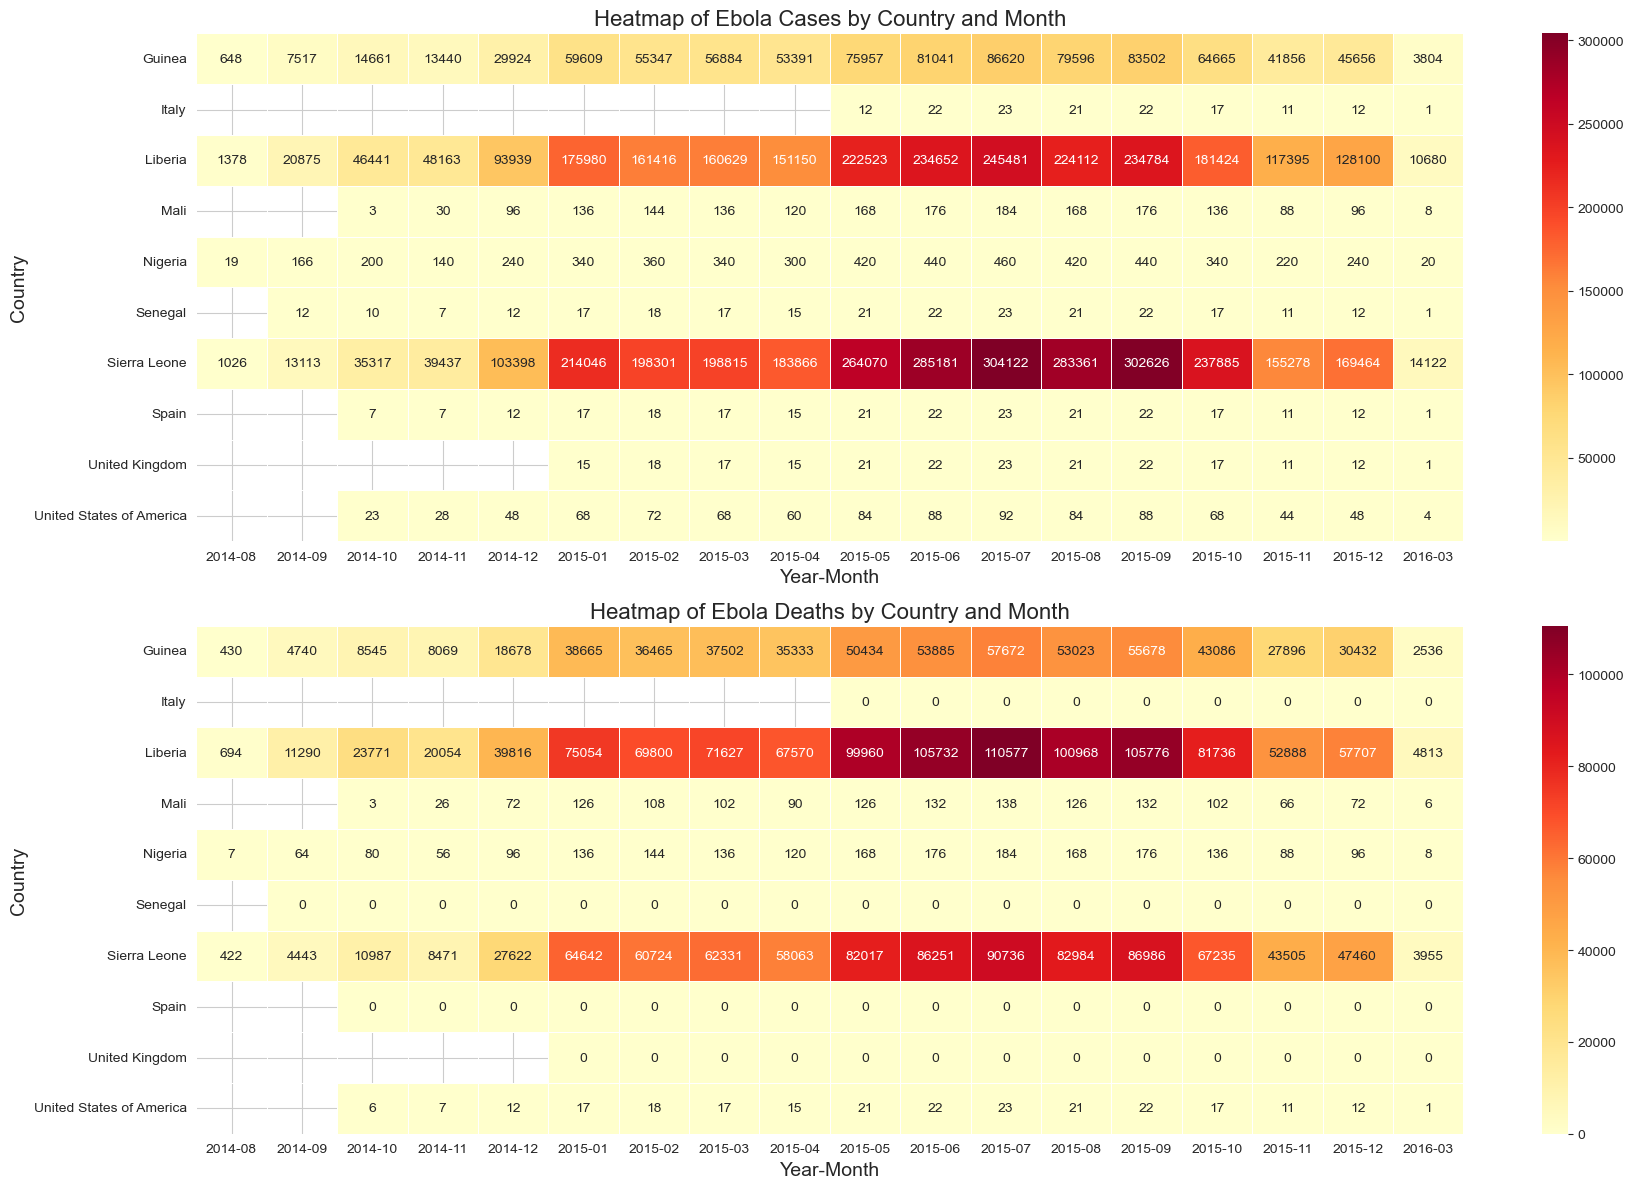

In [72]:
# Aggregating data by country and month for heatmap
monthly_country_data = ebola_data.groupby(['Country', 'YearMonth']).agg({
    'No. of confirmed, probable and suspected cases': 'sum',
    'No. of confirmed, probable and suspected deaths': 'sum'
}).reset_index()

# Pivoting the data for heatmap plotting
cases_heatmap_data = monthly_country_data.pivot("Country", "YearMonth", "No. of confirmed, probable and suspected cases")
deaths_heatmap_data = monthly_country_data.pivot("Country", "YearMonth", "No. of confirmed, probable and suspected deaths")

# Plotting heatmaps
fig, ax = plt.subplots(2, 1, figsize=(18, 12))

# Cases heatmap
sns.heatmap(cases_heatmap_data, ax=ax[0], cmap="YlOrRd", linewidths=.5, annot=True, fmt=".0f")
ax[0].set_title('Heatmap of Ebola Cases by Country and Month', fontsize=16)
ax[0].set_xlabel('Year-Month', fontsize=14)
ax[0].set_ylabel('Country', fontsize=14)

# Deaths heatmap
sns.heatmap(deaths_heatmap_data, ax=ax[1], cmap="YlOrRd", linewidths=.5, annot=True, fmt=".0f")
ax[1].set_title('Heatmap of Ebola Deaths by Country and Month', fontsize=16)
ax[1].set_xlabel('Year-Month', fontsize=14)
ax[1].set_ylabel('Country', fontsize=14)

plt.tight_layout()
plt.show()


In [4]:
import datetime as dt
from datetime import date
df['Dates'] = pd.to_datetime(df['Date'])
df['Year']= df.Dates.dt.year
df['Month_name'] = df.Dates.dt.month_name()
df['Day_name'] = df.Dates.dt.day_name()
df['Month'] = df.Dates.dt.month
df["Week"] = df.Dates.dt.week
df['Day_of_year']= df.Dates.dt.dayofyear


C:\Users\user\AppData\Local\Temp\ipykernel_6728\3355143519.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["Week"] = df.Dates.dt.week


In [5]:
d0 = date(2014,8,29)
d1 = date(2016,3,23)
delta = d1-d0
print(delta)

572 days, 0:00:00


In [6]:
df.head()

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths",Dates,Year,Month_name,Day_name,Month,Week,Day_of_year
0,Guinea,2014-08-29,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430.0,2014-08-29,2014,August,Friday,8,35,241
1,Nigeria,2014-08-29,3.0,1.0,15.0,19.0,0.0,1.0,6.0,7.0,2014-08-29,2014,August,Friday,8,35,241
2,Sierra Leone,2014-08-29,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422.0,2014-08-29,2014,August,Friday,8,35,241
3,Liberia,2014-08-29,382.0,674.0,322.0,1378.0,168.0,301.0,225.0,694.0,2014-08-29,2014,August,Friday,8,35,241
4,Sierra Leone,2014-09-05,78.0,37.0,1146.0,1261.0,11.0,37.0,443.0,491.0,2014-09-05,2014,September,Friday,9,36,248


In [7]:
df.tail()

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths",Dates,Year,Month_name,Day_name,Month,Week,Day_of_year
2480,Liberia,2016-03-23,5636.0,1879.0,3151.0,10666.0,NaN,NaN,NaN,4806.0,2016-03-23,2016,March,Wednesday,3,12,83
2481,Italy,2016-03-23,0.0,0.0,1.0,1.0,NaN,NaN,NaN,0.0,2016-03-23,2016,March,Wednesday,3,12,83
2482,Liberia,2016-03-23,0.0,3.0,2.0,5.0,NaN,3.0,1.0,4.0,2016-03-23,2016,March,Wednesday,3,12,83
2483,Nigeria,2016-03-23,0.0,1.0,19.0,20.0,0.0,1.0,7.0,8.0,2016-03-23,2016,March,Wednesday,3,12,83
2484,United States of America,2016-03-23,0.0,0.0,4.0,4.0,0.0,0.0,1.0,1.0,2016-03-23,2016,March,Wednesday,3,12,83


In [8]:
#Number of rows and columns
df.shape

(2485, 17)

In [52]:
#  Group the data by country and sum the confirmed cases and confirmed deaths
grouped_data = df.groupby('Country')['No. of confirmed cases', 'No. of confirmed deaths'].sum()

# Save the grouped data as a CSV file
# grouped_data.to_csv('confirmed_cases_and_deaths_by_country.csv')

In [45]:
confirmed_cases_by_country = df.groupby('Country')['No. of confirmed cases'].sum()
confirmed_cases_by_country
# # Plotting
# plt.figure(figsize=(8, 8))
# plt.pie(confirmed_cases_by_country, labels=confirmed_cases_by_country.index)
# plt.title('Distribution of Confirmed Cases by Country')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()

Country
Guinea                       749622.0
Italy                           141.0
Liberia                      768738.0
Mali                           1658.0
Nigeria                        4840.0
Senegal                         254.0
Sierra Leone                2041871.0
Spain                           243.0
United Kingdom                  221.0
United States of America        967.0
Name: No. of confirmed cases, dtype: float64

In [10]:
print('The date of the data is from', df.Dates.min(), 'to', df.Dates.max(),',a total amount of'
      , delta)
print('The total number of confirmed cases is', df['No. of confirmed cases'].sum())
print('The total number of confirmed deaths is', df['No. of confirmed deaths'].sum())
print('The total number of suspected cases is', df['No. of suspected cases'].sum())
print('The total number of suspected deaths is', df['No. of suspected deaths'].sum())
print('The total number of probable cases is', df['No. of probable cases'].sum())
print('The total number of probable deaths is', df['No. of probable deaths'].sum())

The date of the data is from 2014-08-29 00:00:00 to 2016-03-23 00:00:00 ,a total amount of 572 days, 0:00:00
The total number of confirmed cases is 3568555.0
The total number of confirmed deaths is 1288179.0
The total number of suspected cases is 2110097.0
The total number of suspected deaths is 43032.0
The total number of probable cases is 642455.0
The total number of probable deaths is 159521.0


In [27]:
#Countries with the highest number confirmed cases (3)
top_countries_con_cases = df.groupby('Country')['No. of confirmed cases'].sum().nlargest(3)

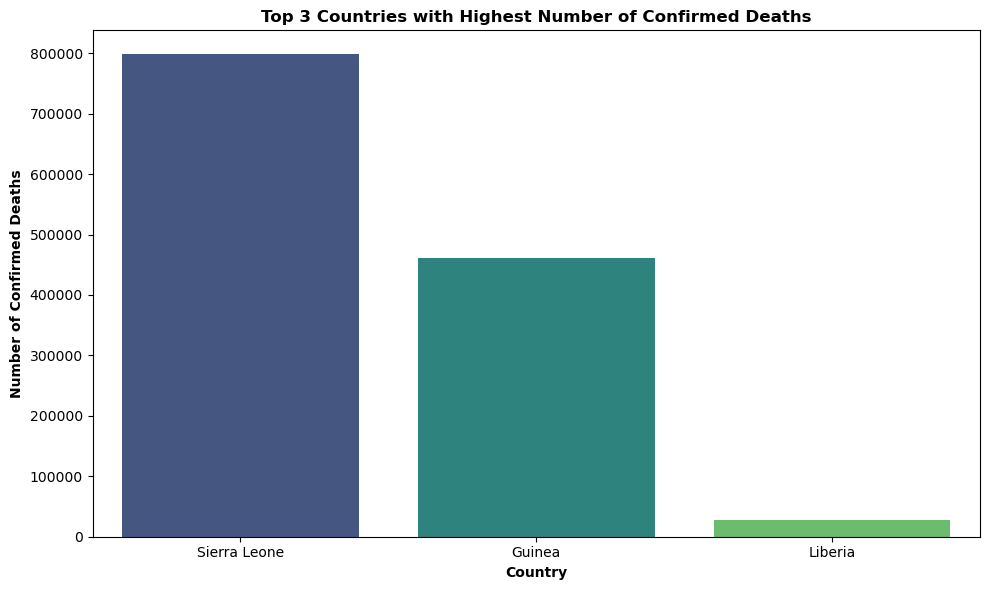

In [33]:
# Assuming df is your DataFrame containing the data
top_countries_con_cases = df.groupby('Country')['No. of confirmed deaths'].sum().nlargest(3)

# Convert the result to a DataFrame for plotting
top_countries_con_cases_df = top_countries_con_cases.reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='No. of confirmed deaths', data=top_countries_con_cases_df, palette='viridis')
plt.title('Top 3 Countries with Highest Number of Confirmed Deaths', fontweight='bold')
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Number of Confirmed Deaths', fontweight='bold')
plt.xticks()  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

In [12]:
#Countries with the highest number confirmed deaths (3)
df.groupby('Country')['No. of confirmed deaths'].sum().nlargest(3)

Country
Sierra Leone    797984.0
Guinea          461211.0
Liberia          26937.0
Name: No. of confirmed deaths, dtype: float64

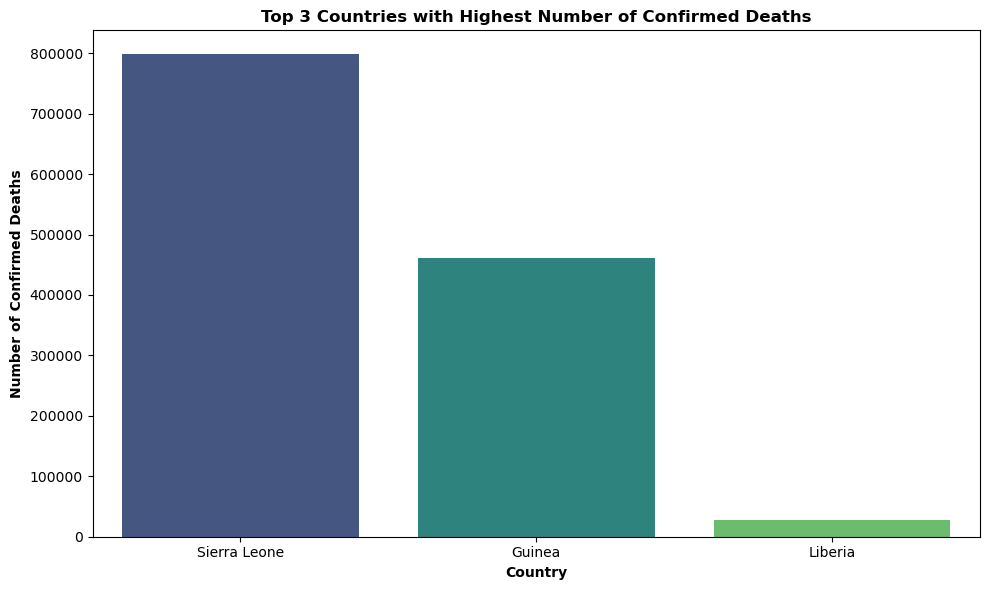

In [34]:
# Compute the top 3 countries with the highest number of confirmed deaths
top_countries_con_deaths = df.groupby('Country')['No. of confirmed deaths'].sum().nlargest(3)

# Convert the result to a DataFrame for plotting
top_countries_con_deaths_df = top_countries_con_deaths.reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='No. of confirmed deaths', data=top_countries_con_deaths_df, palette='viridis')
plt.title('Top 3 Countries with Highest Number of Confirmed Deaths', fontweight='bold')
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Number of Confirmed Deaths', fontweight='bold')
plt.xticks()  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

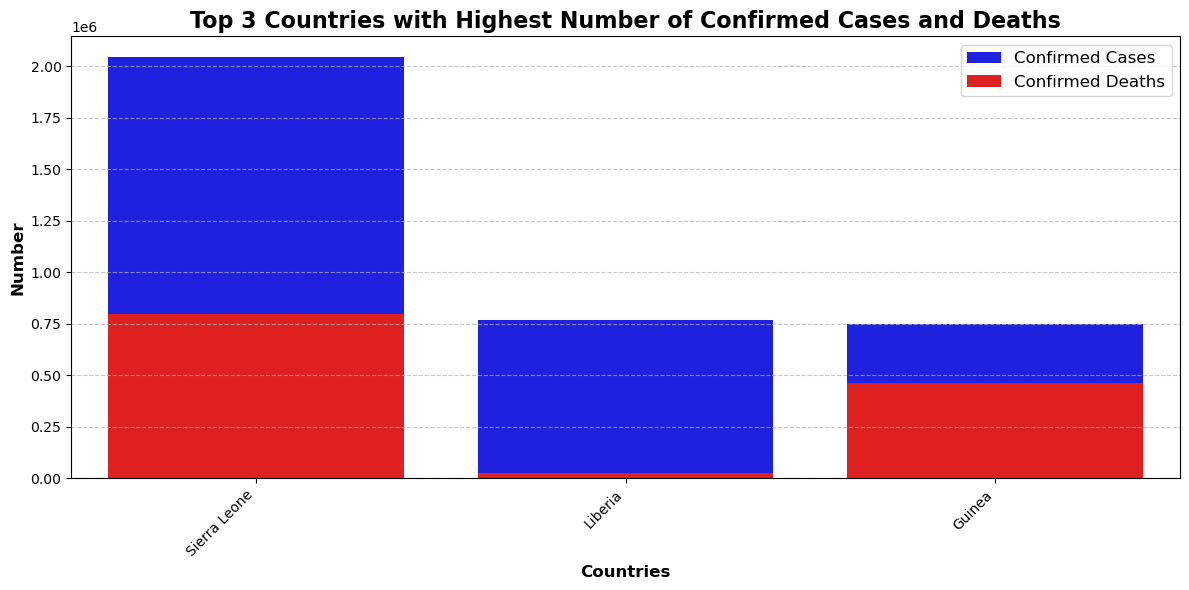

In [35]:

# Compute the top 3 countries with the highest number of confirmed cases and deaths
top_confirmed_cases = df.groupby('Country')['No. of confirmed cases'].sum().nlargest(3)
top_confirmed_deaths = df.groupby('Country')['No. of confirmed deaths'].sum().nlargest(3)

# Convert the results to DataFrames for plotting
top_confirmed_cases_df = top_confirmed_cases.reset_index()
top_confirmed_deaths_df = top_confirmed_deaths.reset_index()

# Combine the two DataFrames for plotting
combined_df = pd.merge(top_confirmed_cases_df, top_confirmed_deaths_df, on='Country', suffixes=('_cases', '_deaths'))

# Plotting
plt.figure(figsize=(12, 6))

# Plotting confirmed cases
sns.barplot(x='Country', y='No. of confirmed cases', data=combined_df, color='blue', label='Confirmed Cases')

# Plotting confirmed deaths
sns.barplot(x='Country', y='No. of confirmed deaths', data=combined_df, color='red', label='Confirmed Deaths')

plt.title('Top 3 Countries with Highest Number of Confirmed Cases and Deaths', fontsize=16, fontweight='bold')
plt.xlabel('Countries', fontsize=12, fontweight='bold')
plt.ylabel('Number', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

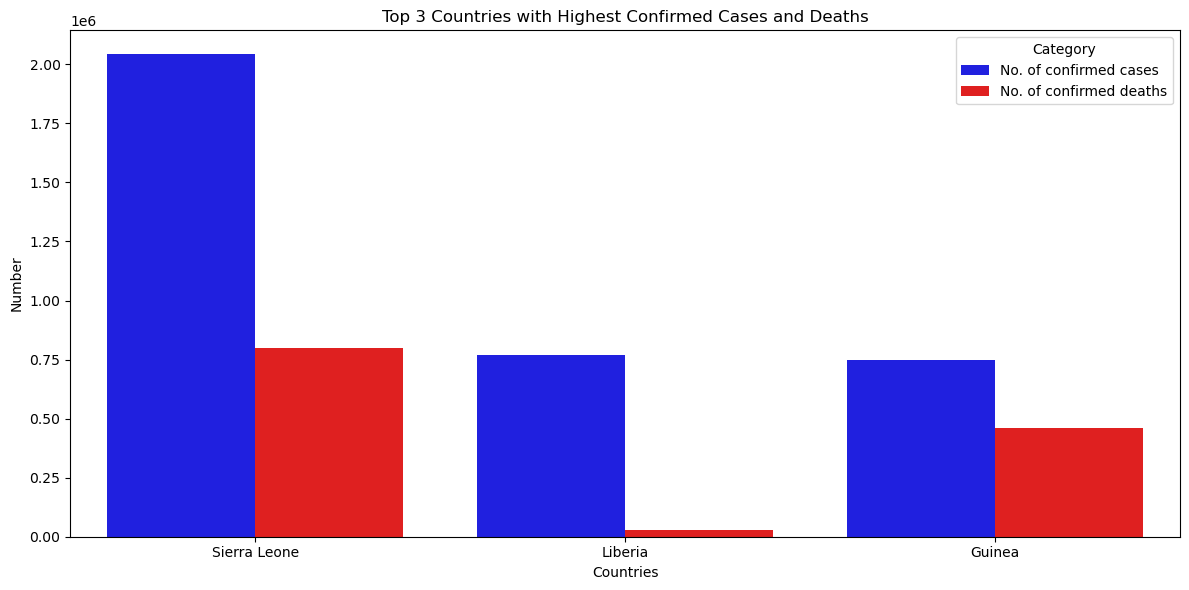

In [38]:

# Compute the top 3 countries with the highest number of confirmed cases and deaths
top_confirmed_cases = df.groupby('Country')['No. of confirmed cases'].sum().nlargest(3)
top_confirmed_deaths = df.groupby('Country')['No. of confirmed deaths'].sum().nlargest(3)

# Convert the results to DataFrames for plotting
top_confirmed_cases_df = top_confirmed_cases.reset_index()
top_confirmed_deaths_df = top_confirmed_deaths.reset_index()

# Merge the DataFrames to combine confirmed cases and confirmed deaths for each country
combined_df = pd.merge(top_confirmed_cases_df, top_confirmed_deaths_df, on='Country', suffixes=('_cases', '_deaths'))

# Melt the combined DataFrame to create a single variable for cases and deaths
melted_df = pd.melt(combined_df, id_vars=['Country'], value_vars=['No. of confirmed cases', 'No. of confirmed deaths'],
                    var_name='Category', value_name='Count')

# Plotting
plt.figure(figsize=(12, 6))

sns.barplot(x='Country', y='Count', hue='Category', data=melted_df, palette=['blue', 'red'])
plt.title('Top 3 Countries with Highest Confirmed Cases and Deaths')
plt.xlabel('Countries')
plt.ylabel('Number')
plt.xticks(rotation=0)
plt.legend(title='Category')

plt.tight_layout()
plt.show()

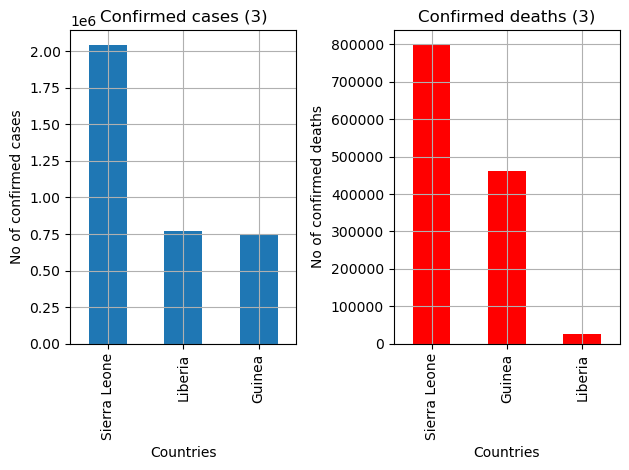

In [13]:
#Barchart showing Countries with the highest number of confirmed cases and highest number confirmed deaths(3)
plt.subplot(1,2,1)
df.groupby('Country')['No. of confirmed cases'].sum().nlargest(3).plot(kind = 'bar', grid = True)
plt.title('Confirmed cases (3)')
plt.xlabel('Countries')
plt.ylabel('No of confirmed cases')
plt.subplot(1,2,2)
df.groupby('Country')['No. of confirmed deaths'].sum().nlargest(3).plot(kind = 'bar', grid = True,
                                                                       color = 'red')
plt.title('Confirmed deaths (3)')
plt.xlabel('Countries')
plt.ylabel('No of confirmed deaths')
plt.tight_layout()
plt.show()

In [14]:
#Countries with the highest number of suspected cases (3)
df.groupby('Country')['No. of suspected cases'].sum().nlargest(3)

Country
Liberia         1212033.0
Sierra Leone     893756.0
Guinea             4293.0
Name: No. of suspected cases, dtype: float64

In [15]:
#Countries with the highest number of suspected deaths (3)
df.groupby('Country')['No. of suspected deaths'].sum().nlargest(3)

Country
Sierra Leone    37054.0
Liberia          5933.0
Guinea             45.0
Name: No. of suspected deaths, dtype: float64

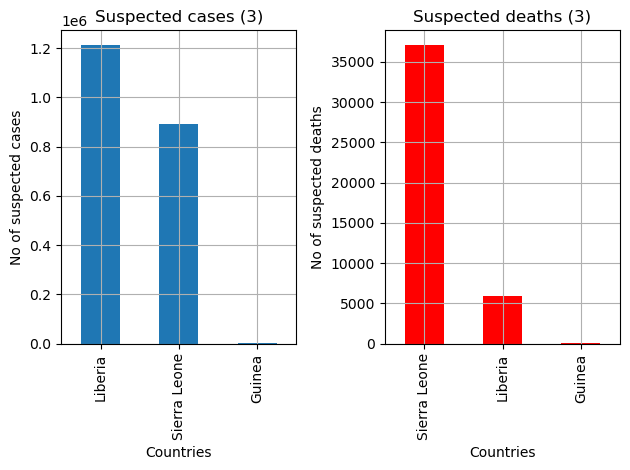

In [16]:
#Barchart showing Countries with the highest number of suspected cases and highest number of suspected deaths(3)
plt.subplot(1,2,1)
df.groupby('Country')['No. of suspected cases'].sum().nlargest(3).plot(kind = 'bar', grid = True)
plt.title('Suspected cases (3)')
plt.xlabel('Countries')
plt.ylabel('No of suspected cases')
plt.subplot(1,2,2)
df.groupby('Country')['No. of suspected deaths'].sum().nlargest(3).plot(kind = 'bar', grid = True,
                                                                       color = 'red')
plt.title('Suspected deaths (3)')
plt.xlabel('Countries')
plt.ylabel('No of suspected deaths')
plt.tight_layout()
plt.show()

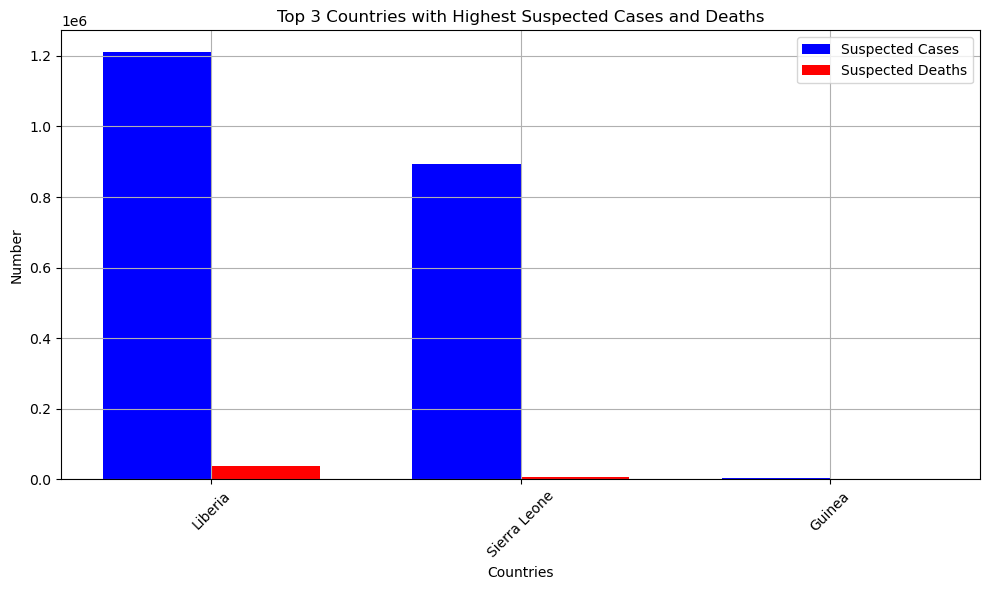

In [54]:

# Compute the top 3 countries with the highest number of suspected cases and deaths
top_suspected_cases = df.groupby('Country')['No. of suspected cases'].sum().nlargest(3)
top_suspected_deaths = df.groupby('Country')['No. of suspected deaths'].sum().nlargest(3)

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Width of each bar
bar_width = 0.35

# Index for the x-axis
index = np.arange(len(top_suspected_cases))

# Plotting suspected cases
bars_cases = ax.bar(index, top_suspected_cases, bar_width, label='Suspected Cases', color='blue')

# Plotting suspected deaths
bars_deaths = ax.bar(index + bar_width, top_suspected_deaths, bar_width, label='Suspected Deaths', color='red')

# Labeling the axes and title
ax.set_xlabel('Countries')
ax.set_ylabel('Number')
ax.set_title('Top 3 Countries with Highest Suspected Cases and Deaths')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_suspected_cases.index, rotation=45)
ax.legend()

# Adding grid
ax.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [17]:
#Countries with the highest number of probable cases(3)
df.groupby('Country')['No. of probable cases'].sum().nlargest(3)

Country
Liberia         474103.0
Guinea          100201.0
Sierra Leone     67657.0
Name: No. of probable cases, dtype: float64

In [18]:
#Countries with the highest number of probable deaths(3)
df.groupby('Country')['No. of probable deaths'].sum().nlargest(3)

Country
Guinea          99799.0
Sierra Leone    50786.0
Liberia          8676.0
Name: No. of probable deaths, dtype: float64

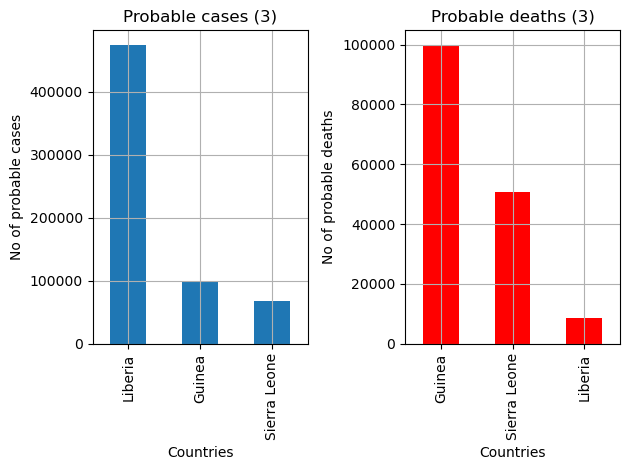

In [19]:
#Barchart showing Countries with the highest number of probable cases and highest number of probable deaths(3)
plt.subplot(1,2,1)
df.groupby('Country')['No. of probable cases'].sum().nlargest(3).plot(kind = 'bar', grid = True)
plt.title('Probable cases (3)')
plt.xlabel('Countries')
plt.ylabel('No of probable cases')
plt.subplot(1,2,2)
df.groupby('Country')['No. of probable deaths'].sum().nlargest(3).plot(kind = 'bar', grid = True,
                                                                       color = 'red')
plt.title('Probable deaths (3)')
plt.xlabel('Countries')
plt.ylabel('No of probable deaths')
plt.tight_layout()
plt.show()

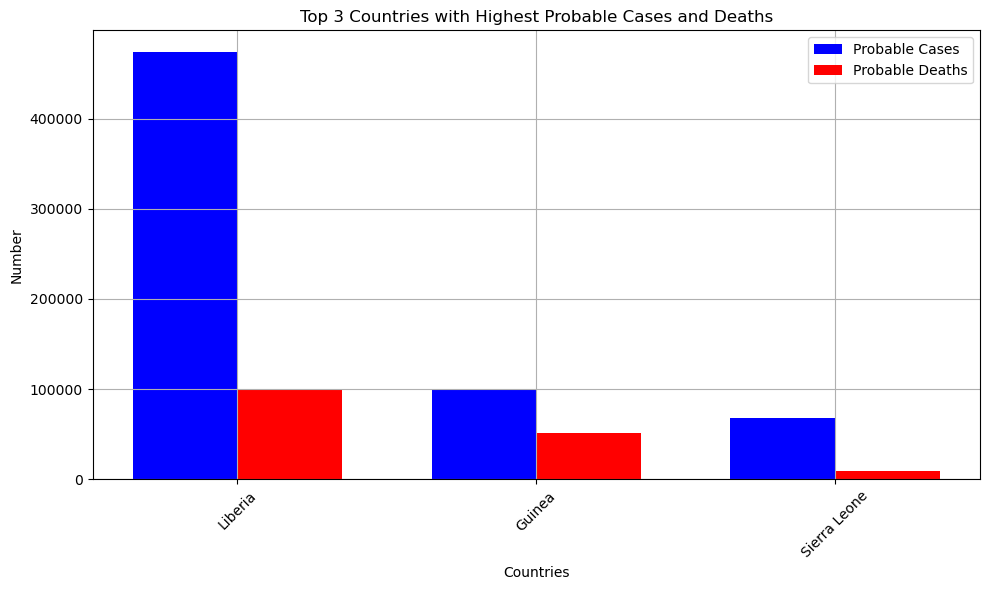

In [55]:

# Compute the top 3 countries with the highest number of probable cases and deaths
top_probable_cases = df.groupby('Country')['No. of probable cases'].sum().nlargest(3)
top_probable_deaths = df.groupby('Country')['No. of probable deaths'].sum().nlargest(3)

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Width of each bar
bar_width = 0.35

# Index for the x-axis
index = np.arange(len(top_probable_cases))

# Plotting probable cases
bars_cases = ax.bar(index, top_probable_cases, bar_width, label='Probable Cases', color='blue')

# Plotting probable deaths
bars_deaths = ax.bar(index + bar_width, top_probable_deaths, bar_width, label='Probable Deaths', color='red')

# Labeling the axes and title
ax.set_xlabel('Countries')
ax.set_ylabel('Number')
ax.set_title('Top 3 Countries with Highest Probable Cases and Deaths')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_probable_cases.index, rotation=45)
ax.legend()

# Adding grid
ax.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [20]:
#Countries with the lowest number of confirmed cases(3)
df.groupby('Country')['No. of confirmed cases'].sum().nsmallest(3)

Country
Italy             141.0
United Kingdom    221.0
Spain             243.0
Name: No. of confirmed cases, dtype: float64

In [21]:
#Countries with the least number of confirmed deaths(3)
df.groupby('Country')['No. of confirmed deaths'].sum().nsmallest(3)

Country
Italy      0.0
Senegal    0.0
Spain      0.0
Name: No. of confirmed deaths, dtype: float64

In [22]:
#Countries with the least number of suspected cases(3)
df.groupby('Country')['No. of suspected cases'].sum().nsmallest(3)

Country
Italy             0.0
Spain             0.0
United Kingdom    0.0
Name: No. of suspected cases, dtype: float64

In [23]:
#Countries with the least number of suspected deaths(3)
df.groupby('Country')['No. of suspected deaths'].sum().nsmallest(3)

Country
Italy      0.0
Mali       0.0
Nigeria    0.0
Name: No. of suspected deaths, dtype: float64

In [24]:
#Countries with the least number of probable cases(3)
df.groupby('Country')['No. of probable cases'].sum().nsmallest(3)

Country
Italy      0.0
Senegal    0.0
Spain      0.0
Name: No. of probable cases, dtype: float64

In [25]:
#Countries with the least number of probable deaths(3)
df.groupby('Country')['No. of probable deaths'].sum().nsmallest(3)

Country
Italy      0.0
Senegal    0.0
Spain      0.0
Name: No. of probable deaths, dtype: float64